In [4]:

import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from PIL import Image
import os

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.labels_map = {
            "O": 0,  # Organic
            "R": 1   # Recycle
        }
        self.image_files = [f for f in os.listdir(root_dir) if f.endswith(".jpg")]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.root_dir, img_name)
        image = Image.open(img_path)
        label = self.labels_map[img_name[0]]  # Extract label from file name (first character)

        if self.transform:
            image = self.transform(image)

        return image, label

# Path to the root directory of your dataset
root_dir = "/Users/prishamarpu/Documents/GitHub/waste-classification/DATASET"

# Define any transformations you want to apply to your data
transform = ToTensor()  # Example transformation: convert images to tensors

train_dataset = CustomDataset(root_dir=root_dir + "/TRAIN", transform=transform)
test_dataset = CustomDataset(root_dir=root_dir + "/TEST", transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [7]:
import os
from PIL import Image

image_dir = "/Users/prishamarpu/Documents/GitHub/waste-classification/DATASET/TRAIN"
output_dir = "/Users/prishamarpu/Documents/GitHub/waste-classification/DATASET/TRAIN2"  # Directory to save resized images
desired_size = (224, 224)

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Iterate through all images in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Filter out non-image files
        # Open the image
        img_path = os.path.join(image_dir, filename)
        img = Image.open(img_path)

        # Resize the image to the desired size
        img = img.resize(desired_size)

        # Convert the image to RGB mode
        img = img.convert("RGB")

        # Save the processed image in the output directory with a different filename
        output_path = os.path.join(output_dir, filename)
        img.save(output_path)



In [94]:


image_dir = "/Users/prishamarpu/Documents/GitHub/waste-classification/DATASET/TEST"

desired_size = (224, 224)  # Adjust the dimensions as needed

# Iterate through all images in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Filter out non-image files
        # Open the image
        img_path = os.path.join(image_dir, filename)
        img = Image.open(img_path)

        # Resize the image to the desired size
        img = img.resize(desired_size)

        # Convert the image to RGB mode
        img = img.convert("RGB")


        # Save the processed image in JPEG format
        img.save(os.path.join(image_dir, filename))

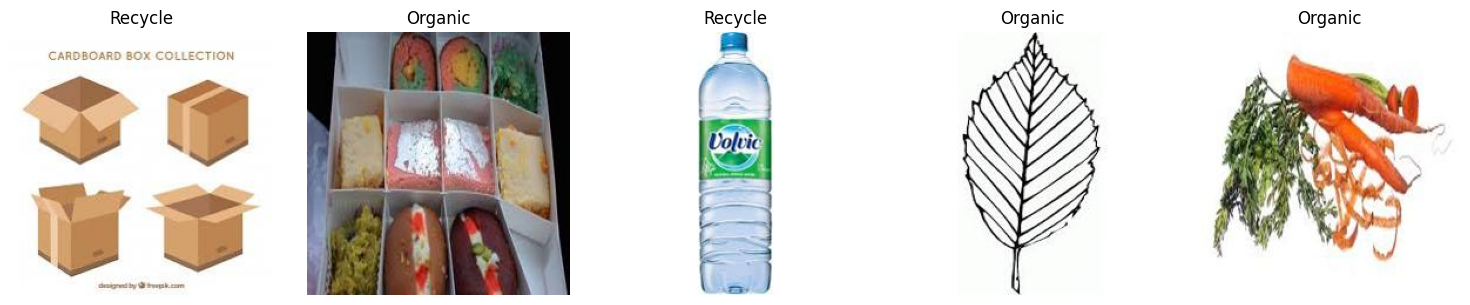

In [97]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import random

# Assuming you have already defined the DataLoader train_loader with labels 0 or 1

labels_map = {
    0: "Organic",
    1: "Recycle"
}

# Assuming image_dir and extract_label function are already defined as in your previous code



num_images_to_plot = 5
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 3))

for i in range(num_images_to_plot):
    # Load a batch of data from train_loader
    train_features, train_labels = next(iter(train_loader))
    
    # Randomly select an image from the batch
    index = random.randrange(len(train_features))
    img = train_features[index]  # Assuming images are already tensor objects
    label_index = train_labels[index].item()
    label = labels_map[label_index]

    # Plot the image
    img = transforms.functional.to_pil_image(img)  # Convert tensor to PIL image
    axes[i].imshow(img)
    axes[i].set_title(label)
    axes[i].axis('off')

plt.tight_layout()
plt.show()



Feature batch shape: torch.Size([64, 3, 224, 224])
Labels batch shape: torch.Size([64])


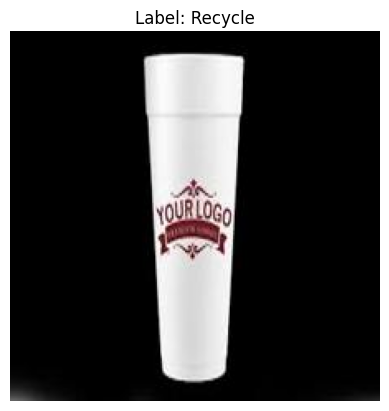

In [69]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].numpy().transpose((1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
label = train_labels[0]

# Plot the image as RGB
plt.imshow(img)
plt.axis('off')
if label==0:
    plt.title(f"Label: Organic")
else:
    plt.title(f"Label: Recycle")
plt.show()


In [75]:
from torchvision.transforms import ToTensor, Lambda
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

In [76]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [77]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
device = "cpu"
print(f"Using {device} device")

Using cpu device


In [78]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [79]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [80]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([5])


In [81]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [82]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [83]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [85]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[0.0000, 0.1899, 0.0000, 0.0000, 0.0000, 0.1591, 0.0131, 0.1205, 0.0000,
         0.0000, 0.0000, 0.0923, 0.0750, 0.4612, 0.3257, 0.3291, 0.1401, 0.0000,
         0.0361, 0.0634],
        [0.0000, 0.0000, 0.0000, 0.0786, 0.0010, 0.5479, 0.0622, 0.4907, 0.0000,
         0.0000, 0.0567, 0.0037, 0.3450, 0.2070, 0.0000, 0.0000, 0.0088, 0.0000,
         0.0226, 0.0000],
        [0.0000, 0.2186, 0.0000, 0.2674, 0.1314, 0.0603, 0.0000, 0.4092, 0.0471,
         0.0000, 0.0000, 0.2530, 0.1524, 0.4075, 0.0190, 0.0167, 0.0000, 0.0000,
         0.0000, 0.2468]], grad_fn=<ReluBackward0>)


After ReLU: tensor([[0.0000, 0.1899, 0.0000, 0.0000, 0.0000, 0.1591, 0.0131, 0.1205, 0.0000,
         0.0000, 0.0000, 0.0923, 0.0750, 0.4612, 0.3257, 0.3291, 0.1401, 0.0000,
         0.0361, 0.0634],
        [0.0000, 0.0000, 0.0000, 0.0786, 0.0010, 0.5479, 0.0622, 0.4907, 0.0000,
         0.0000, 0.0567, 0.0037, 0.3450, 0.2070, 0.0000, 0.0000, 0.0088, 0.0000,
         0.0226, 0.0000],
       

In [86]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [87]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [88]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0223,  0.0218, -0.0033,  ..., -0.0034,  0.0262,  0.0004],
        [ 0.0120,  0.0087, -0.0169,  ...,  0.0139,  0.0052,  0.0102]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0253,  0.0102], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0383, -0.0272, -0.0353,  ..., -0.0343,  0.0059, -0.0309],
        [ 0.0128, -0.0171,  0.0225,  ...,  0.0259, -0.0437, -0.0177]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | 

In [89]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [90]:

loss_fn = nn.CrossEntropyLoss()

In [91]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [92]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)


        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [96]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, model, loss_fn, optimizer)
    test_loop(test_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------


RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x150528 and 784x512)

In [62]:
import torchvision.models as models

In [63]:
model = models.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), 'model_weights.pth')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/prishamarpu/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100.0%


In [64]:
model = models.vgg16() # we do not specify ``weights``, i.e. create untrained model
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [65]:
torch.save(model, 'model.pth')
model = torch.load('model.pth')